Import all the needed libraries and load the datasets.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib as jl

try:
    gmDevData = pd.read_csv('../data/assignment1_dev_set.csv', index_col=0)
    gmValData = pd.read_csv('../data/assignment1_val_set.csv', index_col=0)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

Then we have a basic look into the begginng and the ending of both files just to know what we are dealing with.

In [2]:
print("Development data")
display(gmDevData.head())
display(gmDevData.tail())

print("\n\n\nEvaluation data")
display(gmValData.head())
display(gmValData.tail())

Development data


,Project ID,Experiment type,Sex,Host age,BMI,Disease MESH ID,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,PRJEB11419,Metagenomics,Male,53.0,19.01,D006262,0.000000,0.000000,0.000000,0.000000,...,0.005891,0.029457,0.000000,0.000000,0.002946,0.000000,0.000000,0.000000,0.002946,0.100153
1,PRJNA388263,Metagenomics,Female,21.0,23.50,D006262,0.001028,0.000000,0.000000,0.000000,...,0.000000,0.002569,0.412652,0.003083,0.000000,0.000000,0.008736,0.014903,0.077597,0.004625
2,PRJNA388263,Metagenomics,Male,52.0,25.80,D006262,0.001406,0.000000,0.000000,0.001406,...,0.000000,0.005624,0.002812,0.007031,0.000000,0.000000,0.000000,0.000000,0.005624,0.016873
3,PRJEB11419,Metagenomics,Female,40.0,23.49,D006262,0.000000,0.008825,0.273562,0.000000,...,0.017649,0.198553,0.000000,0.158842,0.030886,0.101483,0.000000,0.000000,0.000000,0.000000
4,PRJEB11419,Metagenomics,Female,30.0,22.60,D006262,0.002878,0.037419,7.359970,0.000000,...,0.305106,0.135283,0.000000,0.051811,0.054689,0.083473,0.020148,0.000000,0.054689,0.011513


,Project ID,Experiment type,Sex,Host age,BMI,Disease MESH ID,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
484,PRJNA397219,Metagenomics,Male,60.0,24.97,D006262,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002160,0.000000,0.000000
485,PRJNA388263,Metagenomics,Male,52.0,25.80,D006262,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.017105,0.001770,0.032834,0.000000,0.000590,0.000393,0.000000,0.000197,0.004522
486,PRJNA397219,Metagenomics,Male,78.0,29.53,D006262,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.309092,0.052094,0.197958,0.000000,0.006946,0.000000,0.017365,0.065986,0.000000
487,PRJEB11419,Metagenomics,Male,43.0,25.55,D006262,0.001556,0.001556,0.122888,0.000000,...,0.017111,0.057555,0.000000,0.054444,0.000000,0.045111,0.010889,0.000000,0.009333,0.018667
488,PRJNA485797,Metagenomics,Female,51.0,22.59,D006262,0.000000,0.011382,7.660350,0.005691,...,0.045530,0.017074,0.000000,0.045530,0.079677,0.000000,0.000000,0.000000,0.073985,0.153662





Evaluation data


,Project ID,Experiment type,Sex,Host age,BMI,Disease MESH ID,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,PRJEB11419,Metagenomics,Male,60.0,25.71,D006262,0.0,0.000000,1.621960,0.0,...,0.000000,2.871240,0.0,0.068238,0.115479,0.015747,0.010498,0.000000,0.010498,0.551152
1,PRJNA379979,Metagenomics,Male,57.0,27.20,D006262,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,PRJEB11419,Metagenomics,Male,65.0,22.35,D006262,0.0,0.002095,0.000000,0.0,...,0.000000,0.064936,0.0,0.016758,0.000000,0.041895,0.010474,0.006284,0.014663,0.000000
3,PRJEB11419,Metagenomics,Male,55.0,25.52,D006262,0.0,0.000000,0.044998,0.0,...,0.003461,0.089996,0.0,0.003461,0.006923,0.000000,0.000000,0.020768,0.034614,0.013846
4,PRJNA379979,Metagenomics,Female,54.0,21.60,D006262,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


,Project ID,Experiment type,Sex,Host age,BMI,Disease MESH ID,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
206,PRJEB11419,Metagenomics,Female,51.0,22.67,D006262,0.0,0.0,0.692094,0.000000,...,0.010104,0.383935,0.000000,0.070725,0.0,0.045466,0.000000,0.000000,0.000000,0.015155
207,PRJNA379979,Metagenomics,Male,54.0,25.60,D006262,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
208,PRJNA388263,Metagenomics,Male,52.0,25.80,D006262,0.0,0.0,0.000000,0.001452,...,0.000000,0.023239,0.001452,0.015977,0.0,0.000000,0.001452,0.000000,0.013072,0.015977
209,PRJEB11419,Metagenomics,Male,26.0,26.54,D006262,0.0,0.0,0.015966,0.000000,...,0.005322,0.564130,0.000000,0.015966,0.0,0.074508,0.000000,0.000000,0.000000,0.021288
210,PRJEB11419,Metagenomics,Female,19.0,22.86,D006262,0.0,0.0,0.000000,0.000000,...,0.000000,0.125413,0.000000,0.197621,0.0,0.003800,0.003800,0.030403,0.000000,0.543458


We also see some statistics and the description provided by pandas.

In [3]:
# Check basic information
print("Development Data Info:")
display(gmDevData.info())

# Summary statistics
print("\nDevelopment Data Statistics:")
display(gmDevData.describe())

# Check basic information
print("Evaluation Data Info:")
display(gmValData.info())

# Summary statistics
print("\nEvaluation Data Statistics:")
display(gmValData.describe())

Development Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 489 entries, 0 to 488
Columns: 140 entries, Project ID to Ruminococcus gnavus
dtypes: float64(136), object(4)
memory usage: 538.7+ KB


None


Development Data Statistics:


,Host age,BMI,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,Alistipes obesi,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
count,489.000000,489.00000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,...,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,46.703497,24.93955,0.016818,0.029968,0.294917,0.001608,1.555914,0.249606,0.061796,0.096388,...,0.029822,0.247603,0.032148,0.097871,0.052936,0.038531,0.006565,0.012565,0.041855,0.091976
std,15.728231,4.20771,0.145035,0.197816,0.804704,0.010431,4.306539,0.630670,0.239054,0.402261,...,0.090605,0.490321,0.180606,0.197044,0.310313,0.122225,0.018357,0.097056,0.181979,0.416085
min,19.000000,16.97000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,22.38000,0.000000,0.000000,0.000000,0.000000,0.003438,0.003380,0.000000,0.000000,...,0.000000,0.002570,0.000000,0.004881,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52.000000,25.10000,0.000000,0.000000,0.001109,0.000000,0.034284,0.044961,0.000000,0.000000,...,0.000260,0.047224,0.000000,0.029362,0.000000,0.001687,0.000000,0.000000,0.003266,0.007035
75%,58.000000,25.80000,0.000000,0.000000,0.129398,0.000000,0.820242,0.188550,0.045111,0.000000,...,0.027723,0.303173,0.005768,0.100294,0.015439,0.018352,0.005693,0.000000,0.020020,0.020978
max,81.000000,67.26000,2.861300,2.622820,7.660350,0.206426,38.834900,6.068670,4.478660,4.939130,...,1.465160,3.714530,3.118150,1.801190,4.726220,1.173380,0.273194,1.939150,2.478070,6.752840


Evaluation Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 211 entries, 0 to 210
Columns: 140 entries, Project ID to Ruminococcus gnavus
dtypes: float64(136), object(4)
memory usage: 232.4+ KB


None


Evaluation Data Statistics:


,Host age,BMI,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,Alistipes obesi,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,...,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,46.303318,24.800853,0.028603,0.007540,0.333079,0.006520,1.275855,0.256110,0.056868,0.047105,...,0.023161,0.231486,0.036935,0.102440,0.031075,0.049638,0.006270,0.012285,0.017258,0.131753
std,16.056832,3.987255,0.209176,0.049924,0.857101,0.052926,3.757554,0.800050,0.239581,0.231250,...,0.061168,0.539919,0.204636,0.210114,0.133408,0.210740,0.013510,0.117794,0.039845,0.661640
min,19.000000,16.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,22.220000,0.000000,0.000000,0.000000,0.000000,0.002942,0.002488,0.000000,0.000000,...,0.000000,0.002643,0.000000,0.001640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52.000000,25.100000,0.000000,0.000000,0.001429,0.000000,0.044957,0.057409,0.000000,0.000000,...,0.000000,0.046365,0.000000,0.024696,0.000000,0.003468,0.000000,0.000000,0.002977,0.005630
75%,57.000000,25.800000,0.000000,0.000000,0.112273,0.000833,0.560304,0.198418,0.025187,0.000000,...,0.017703,0.267308,0.006942,0.108798,0.010384,0.022265,0.005369,0.000000,0.015401,0.019473
max,79.000000,45.200000,2.740080,0.565065,4.708840,0.645116,32.133600,9.857790,3.187810,2.675230,...,0.549399,5.549120,2.708990,1.726760,1.683160,2.310910,0.086478,1.696490,0.325267,6.537770


We then want to check if we have any missing values so we can impute or clean them accordingly.

In [4]:
# 1. Show Missing Values
print("Checking for missing values in development and validation datasets...\n")

# Development data
print("Development data")
missing_dev = gmDevData.isnull().sum()
display(missing_dev)

# Validation data
print("Validation data")
missing_val = gmValData.isnull().sum()
display(missing_val)


Checking for missing values in development and validation datasets...

Development data


Project ID                   0
Experiment type              0
Sex                          0
Host age                     0
BMI                          0
                            ..
Clostridium xylanolyticum    0
Eubacterium brachy           0
Eubacterium dolichum         0
Eubacterium sulci            0
Ruminococcus gnavus          0
Length: 140, dtype: int64

Validation data


Project ID                   0
Experiment type              0
Sex                          0
Host age                     0
BMI                          0
                            ..
Clostridium xylanolyticum    0
Eubacterium brachy           0
Eubacterium dolichum         0
Eubacterium sulci            0
Ruminococcus gnavus          0
Length: 140, dtype: int64

As there are no missing data we don't need to do cleaning or imputing.

In [5]:
# Development data
missing_dev = missing_dev[missing_dev > 0]  # Filter columns with missing values
print("Development Data - Missing Values:\n", missing_dev)

# Validation data
missing_val = missing_val[missing_val > 0]  # Filter columns with missing values
print("\nValidation Data - Missing Values:\n", missing_val)

# If no missing values, notify user and proceed
if missing_dev.empty and missing_val.empty:
    print("\nNo missing values found in either dataset.")
else:
    print("\nMissing values detected. Proceeding with cleaning...")

Development Data - Missing Values:
 Series([], dtype: int64)

Validation Data - Missing Values:
 Series([], dtype: int64)

No missing values found in either dataset.


We proceed with cleaning our development data. We remove null, duplicates.

In [6]:
# Remove any rows with missing values
gmDevData.dropna(inplace=True) # Will not do something

# Remove any duplicate rows
gmDevData.drop_duplicates(inplace=True)

# Reset the index
gmDevData.reset_index(drop=True, inplace=True)

We want to find all the values that are of no interest. We see the unique values per column.

In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(gmDevData.apply(lambda col: col.nunique(), axis=0))

Project ID                                   6
Experiment type                              1
Sex                                          2
Host age                                    67
BMI                                        230
Disease MESH ID                              1
Acholeplasma axanthum                       85
Acidaminococcus fermentans                  99
Acidaminococcus intestini                  259
Actinomyces lingnae                        102
Akkermansia muciniphila                    401
Alistipes finegoldii                       380
Alistipes indistinctus                     220
Alistipes obesi                             63
Alistipes onderdonkii                      445
Alistipes putredinis                       427
Alistipes shahii                           421
Alistipes sp. RMA 9912                     107
Alistipes timonensis                       339
Anaerofilum pentosovorans                  275
Anaerofustis stercorihominis               120
Anaerostipes 

From earlier we know that the dataset has some columns like Disease MESH ID "D006262" that is the same for every patient (it denotes a patient in good health). These are irrelevant to our work so we are better off droping them now. We also don't need Experiment type and Project ID.

In [8]:
# gmDevData.drop(columns=["Unnamed: 0"], inplace=True)
gmDevData.drop(columns=["Project ID"], inplace=True)
gmDevData.drop(columns=["Experiment type"], inplace=True)
gmDevData.drop(columns=["Disease MESH ID"], inplace=True)

# gmValData.drop(columns=["Unnamed: 0"], inplace=True)
gmValData.drop(columns=["Project ID"], inplace=True)
gmValData.drop(columns=["Experiment type"], inplace=True)
gmValData.drop(columns=["Disease MESH ID"], inplace=True)

We will calculate the IQR (interquartile range) for our development data.

In [9]:
def ciqr(df, col):
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1
    return IQR
    
iqr = {col: ciqr(gmDevData, col) for col in gmDevData.select_dtypes(include=np.number).columns}
iqr

{'Host age': 27.0,
 'BMI': 3.4200000000000017,
 'Acholeplasma axanthum': 0.0,
 'Acidaminococcus fermentans': 0.0,
 'Acidaminococcus intestini': 0.129398,
 'Actinomyces lingnae': 0.0,
 'Akkermansia muciniphila': 0.8168042200000001,
 'Alistipes finegoldii': 0.18517,
 'Alistipes indistinctus': 0.0451109,
 'Alistipes obesi': 0.0,
 'Alistipes onderdonkii': 0.5031164,
 'Alistipes putredinis': 1.6301164000000001,
 'Alistipes shahii': 0.4512366,
 'Alistipes sp. RMA 9912': 0.0,
 'Alistipes timonensis': 0.0451287,
 'Anaerofilum pentosovorans': 0.0202963,
 'Anaerofustis stercorihominis': 0.0,
 'Anaerostipes butyraticus': 0.0132369,
 'Anaerostipes caccae': 0.0110996,
 'Anaerotruncus colihominis': 0.21562242,
 'Bacillus megaterium': 0.00375101,
 'Bacillus nealsonii': 0.00784827,
 'Bacteroides eggerthii': 0.0324928,
 'Bacteroides fragilis': 0.23636882,
 'Bacteroides gallinarum': 0.00285927,
 'Bacteroides graminisolvens': 0.0,
 'Bacteroides intestinalis': 0.09388272,
 'Bacteroides massiliensis': 0.60

We can see that quite some values have an IQR of 0 which may be of interest.

In [10]:
{key: value for key, value in iqr.items() if value == 0 and key not in ["BMI"]}

{'Acholeplasma axanthum': 0.0,
 'Acidaminococcus fermentans': 0.0,
 'Actinomyces lingnae': 0.0,
 'Alistipes obesi': 0.0,
 'Alistipes sp. RMA 9912': 0.0,
 'Anaerofustis stercorihominis': 0.0,
 'Bacteroides graminisolvens': 0.0,
 'Bifidobacterium bifidum': 0.0,
 'Butyricimonas virosa': 0.0,
 'Catabacter hongkongensis': 0.0,
 'Clostridium amylolyticum': 0.0,
 'Clostridium malenominatum': 0.0,
 'Clostridium sp.': 0.0,
 'Collinsella tanakaei': 0.0,
 'Coprococcus catus': 0.0,
 'Desulfonispora thiosulfatigenes': 0.0,
 'Desulfosporosinus orientis': 0.0,
 'Desulfovibrio piger': 0.0,
 'Desulfovibrio vulgaris': 0.0,
 'Ethanoligenens harbinense': 0.0,
 'Flavonifractor plautii': 0.0,
 'Fusobacterium nucleatum': 0.0,
 'Hungatella hathewayi': 0.0,
 'Lachnospiraceae bacterium 3_1_57FAA_CT1': 0.0,
 'Lachnospiraceae bacterium 5_1_63FAA': 0.0,
 'Lachnospiraceae bacterium 7_1_58FAA': 0.0,
 'Oxalobacter formigenes': 0.0,
 'Papillibacter cinnamivorans': 0.0,
 'Porphyromonas catoniae': 0.0,
 'Prevotella oryz

And we want to see which ones are the opposing outliers (with a big IQR).

In [11]:
{key: value for key, value in iqr.items() if value > 3 and key not in ["BMI"]}

{'Host age': 27.0, 'Faecalibacterium sp. MC_41': 6.74015}

Seeing the amount of zeros existing in our dataset it is interesting to see how extended is its occurance in our dataset.

,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,Alistipes obesi,Alistipes onderdonkii,Alistipes putredinis,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,True,True,True,True,False,True,True,True,False,False,...,False,False,True,True,False,True,True,True,False,False
1,False,True,True,True,False,False,True,True,False,False,...,True,False,False,False,True,True,False,False,False,False
2,False,True,True,False,False,False,True,True,False,False,...,True,False,False,False,True,True,True,True,False,False
3,True,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,True,True,True,True
4,False,False,False,True,False,True,True,True,False,False,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,True,True,True,True,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,True,True
485,True,True,True,True,False,False,True,True,False,False,...,True,False,False,False,True,False,False,True,False,False
486,True,True,True,True,False,False,True,True,False,False,...,True,False,False,False,True,False,True,False,False,True
487,False,False,False,True,True,False,False,True,False,False,...,False,False,True,False,True,False,False,True,False,False


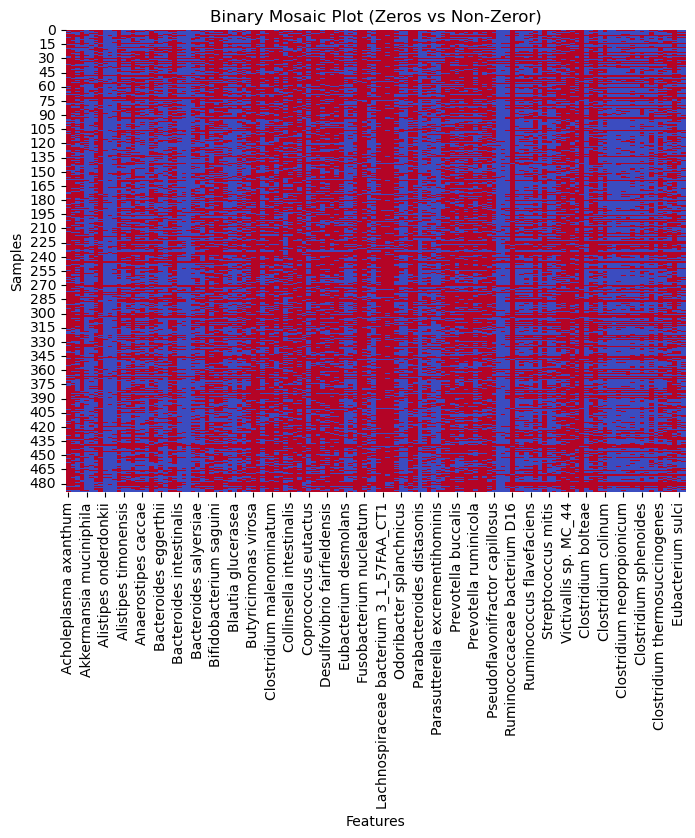

Acholeplasma axanthum         82.822086
Acidaminococcus fermentans    79.959100
Acidaminococcus intestini     47.239264
Actinomyces lingnae           79.141104
Akkermansia muciniphila       18.200409
                                ...    
Clostridium xylanolyticum     43.149284
Eubacterium brachy            56.032720
Eubacterium dolichum          76.073620
Eubacterium sulci             42.331288
Ruminococcus gnavus           31.901840
Length: 134, dtype: float64


The mean value of zeros per feature is: 54.118975673778344% over 134 features.


In [12]:
labelCols = ["BMI", "Host age", "Sex"]
binZeroMap = gmDevData.drop(columns=labelCols) == 0
# display(gmDevData.drop(columns=labelCols).sum(axis=1))
display(binZeroMap)
plt.figure(figsize=(8,6))
sns.heatmap(binZeroMap.map(lambda x: 0 if x == 0 else 1), cmap="coolwarm", cbar=False)
plt.title("Binary Mosaic Plot (Zeros vs Non-Zeror)")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.show()

dzeros = (gmDevData.drop(columns=labelCols) == 0).sum() / len(gmDevData) * 100
display(dzeros)
print("\nThe mean value of zeros per feature is: " + str(dzeros.mean()) + "% over " + str(len(dzeros)) + " features." )

We proceed to calculate the prevalence of our features and store the low prevelance columns so we can drop later everything that is under a threshold.

In [13]:
prevalence = (gmDevData.drop(columns=labelCols) != 0).sum() / len(gmDevData) * 100

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(prevalence)

lowPrevFeat = prevalence[prevalence < 10].index.tolist()

print("The following " + str(len(lowPrevFeat)) + " features are going to be removed:")
display(lowPrevFeat)
# gmDevData.drop(columns=lowPrevFeat, inplace=True)
# gmValData.drop(columns=lowPrevFeat, inplace=True)

# display(gmDevData.info())
# display(gmValData.info())

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(gmValData.head())


Acholeplasma axanthum                      17.177914
Acidaminococcus fermentans                 20.040900
Acidaminococcus intestini                  52.760736
Actinomyces lingnae                        20.858896
Akkermansia muciniphila                    81.799591
Alistipes finegoldii                       77.505112
Alistipes indistinctus                     44.785276
Alistipes obesi                            12.678937
Alistipes onderdonkii                      90.797546
Alistipes putredinis                       87.116564
Alistipes shahii                           85.889571
Alistipes sp. RMA 9912                     21.676892
Alistipes timonensis                       69.120654
Anaerofilum pentosovorans                  56.237219
Anaerofustis stercorihominis               24.335378
Anaerostipes butyraticus                   57.464213
Anaerostipes caccae                        52.556237
Anaerotruncus colihominis                  77.300613
Bacillus megaterium                        30.

The following 5 features are going to be removed:


['Flavonifractor plautii',
 'Lachnospiraceae bacterium 3_1_57FAA_CT1',
 'Lachnospiraceae bacterium 7_1_58FAA',
 'Ruminococcaceae bacterium D16',
 'Clostridium asparagiforme']

Here we could also perform Zero-Inflated Dirichlet Tree Multinomial (ZIDTM) imputation to the rest of our zero values. However, as I am not a biologist I am not sure this is ok to do. :P
Providing the code (commented out) none the less.

In [14]:
# def zidtm_impute(data, pseudo_count=0.5):
#     # Add pseudo-count to all entries
#     imputed_data = data + pseudo_count
    
#     # Normalize rows to sum to 1 (relative abundances)
#     imputed_data = imputed_data.div(imputed_data.sum(axis=1), axis=0)

#     return imputed_data

# gmDevData = zidtm_impute(gmDevData)

We also visualize the BMI to get a more intuitive idea of what is happening.

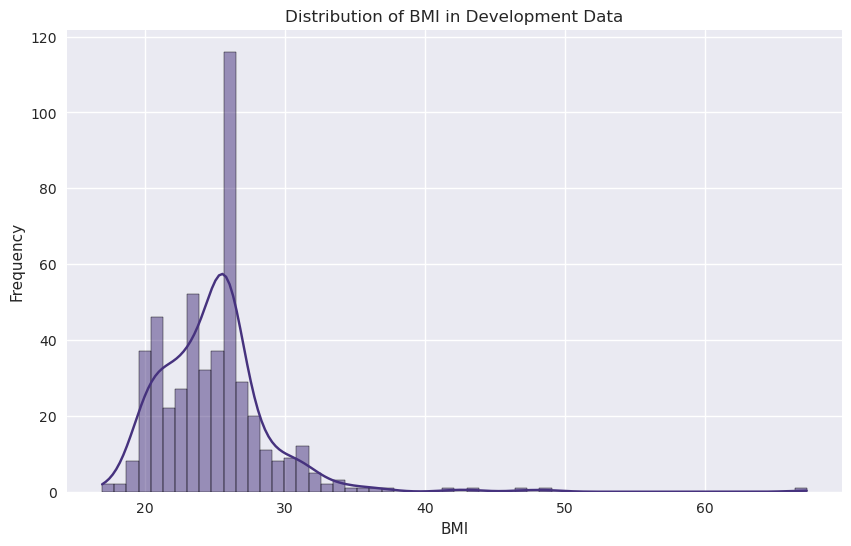

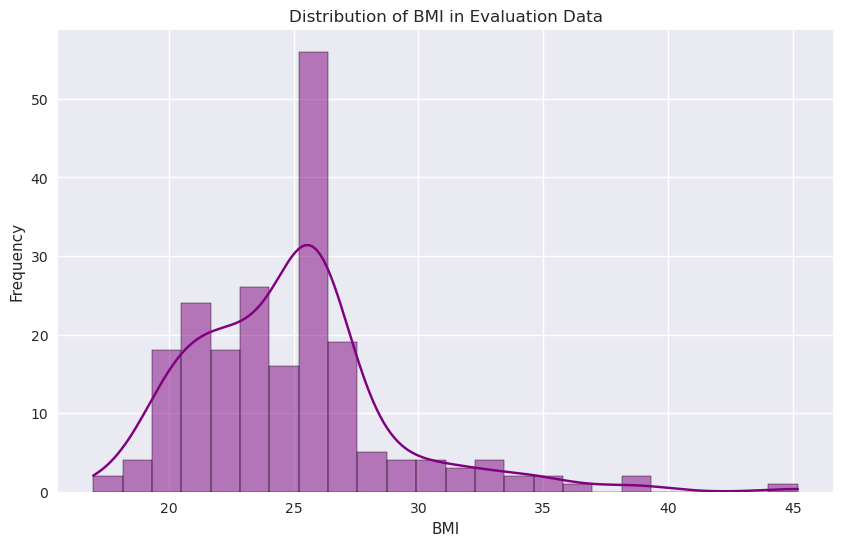

In [15]:
import seaborn as sns
plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')

plt.figure(figsize=(10, 6))
sns.histplot(gmDevData['BMI'], kde=True)
plt.title('Distribution of BMI in Development Data')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(gmValData['BMI'], kde=True, color='purple')
plt.title('Distribution of BMI in Evaluation Data')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()



And then we also do a correlation heatmap assuming there are numerical features related to gut microbiome

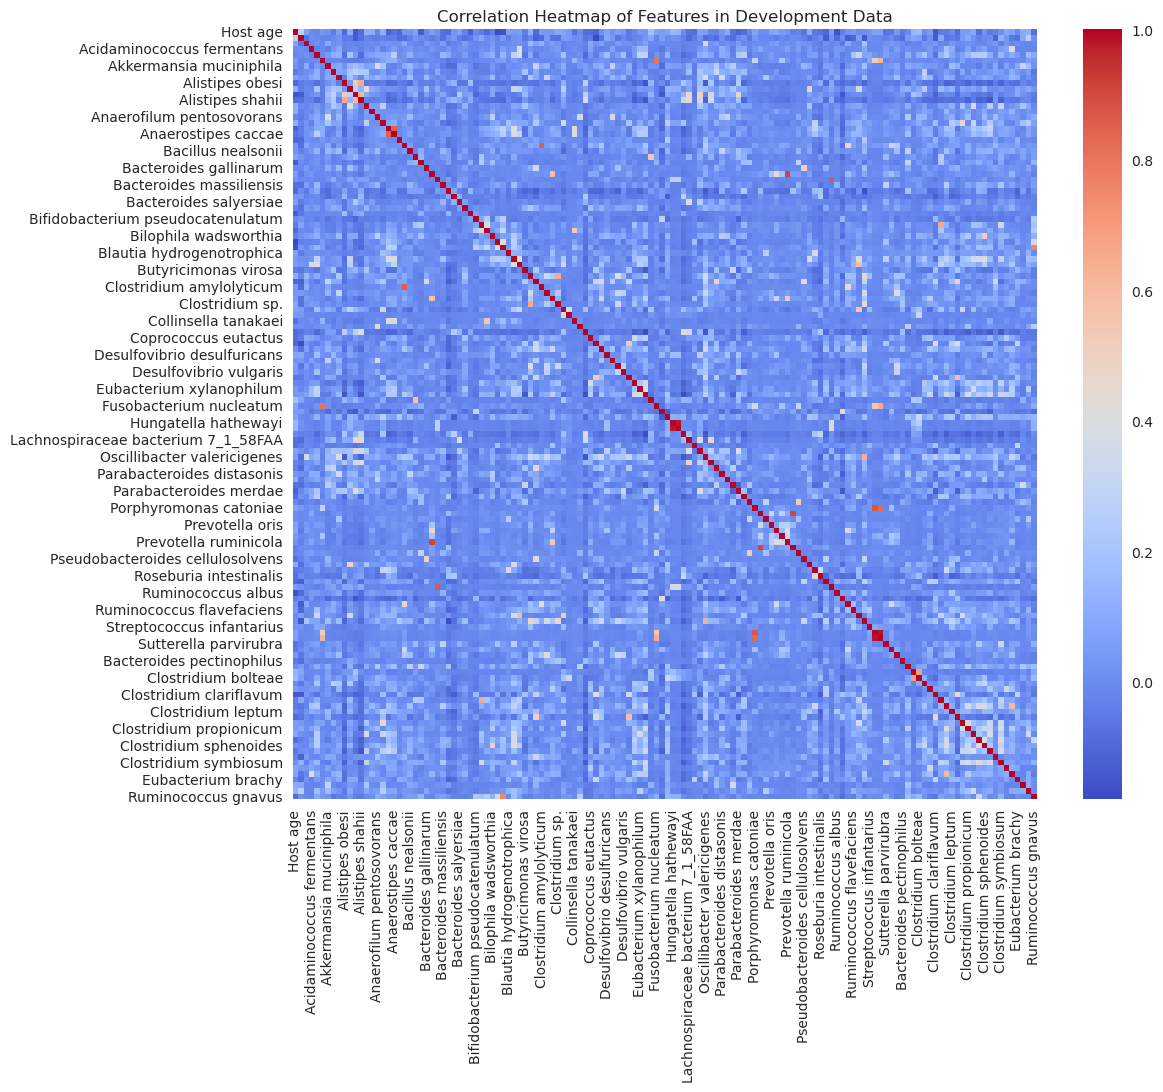

In [16]:
plt.figure(figsize=(12, 10))
corr_matrix = gmDevData.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Features in Development Data')
plt.show()

As we see the BMI seems to have low correlation and is not shown so we do a correlation specific to BMI and keep only the edge results.

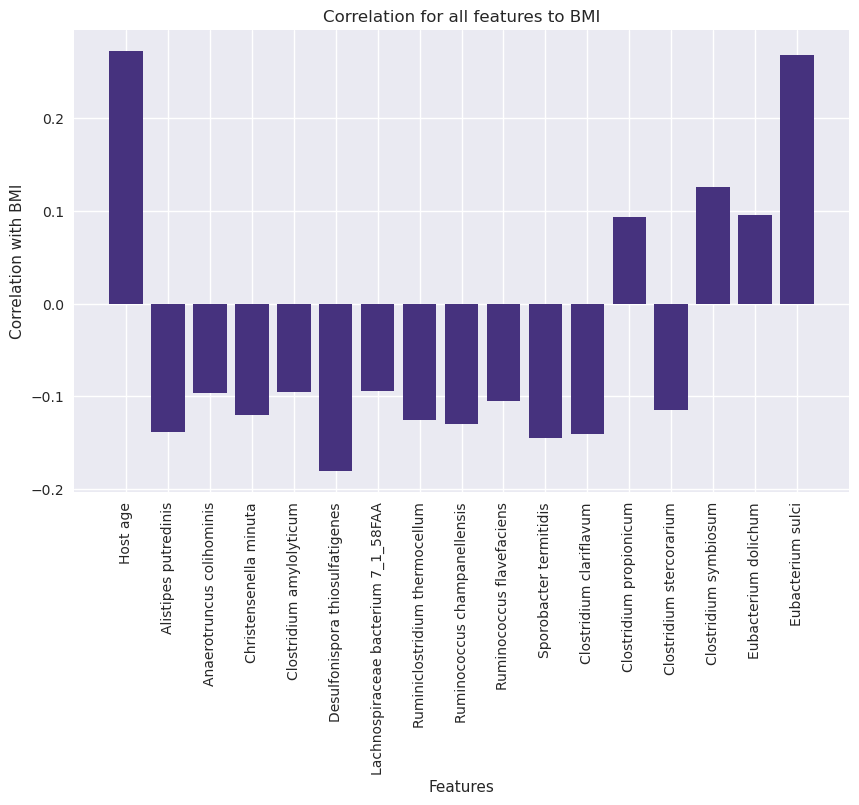

In [17]:
plt.figure(figsize=(10, 6))
correlations = corr_matrix["BMI"].drop("BMI")
correlationsFitlered = correlations[abs(correlations) > 0.09]
#correlationsFitlered = correlations.loc[correlations.abs().sort_values(ascending=True).head(20).index]
plt.bar(correlationsFitlered.index, correlationsFitlered.values)
plt.xlabel("Features")
plt.ylabel("Correlation with BMI")
plt.title("Correlation for all features to BMI")
plt.xticks(rotation=90)
plt.show()

As we also saw from the IQR calculations we had some outliers and the data is known not to be scaled (per the excercise description). We need to scale them accordingly.

We still have, however, one categorical column, the sex of the subject. We can encode this as one-hot encoded.

In [18]:
from sklearn.preprocessing import LabelEncoder

sexEncoder = LabelEncoder()
gmDevData["Sex"] = sexEncoder.fit_transform(gmDevData["Sex"])
gmValData["Sex"] = sexEncoder.transform(gmValData["Sex"])

display(gmDevData.head())
display(gmValData.head())

# We see that Male is encoded as 1 and Female as 0


,Sex,Host age,BMI,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,1,53.0,19.01,0.000000,0.000000,0.000000,0.000000,0.017674,0.000000,0.00000,...,0.005891,0.029457,0.000000,0.000000,0.002946,0.000000,0.000000,0.000000,0.002946,0.100153
1,0,21.0,23.50,0.001028,0.000000,0.000000,0.000000,13.015800,0.001542,0.00000,...,0.000000,0.002569,0.412652,0.003083,0.000000,0.000000,0.008736,0.014903,0.077597,0.004625
2,1,52.0,25.80,0.001406,0.000000,0.000000,0.001406,0.002812,0.201074,0.00000,...,0.000000,0.005624,0.002812,0.007031,0.000000,0.000000,0.000000,0.000000,0.005624,0.016873
3,0,40.0,23.49,0.000000,0.008825,0.273562,0.000000,0.044123,0.004412,0.34857,...,0.017649,0.198553,0.000000,0.158842,0.030886,0.101483,0.000000,0.000000,0.000000,0.000000
4,0,30.0,22.60,0.002878,0.037419,7.359970,0.000000,0.872143,0.000000,0.00000,...,0.305106,0.135283,0.000000,0.051811,0.054689,0.083473,0.020148,0.000000,0.054689,0.011513


,Sex,Host age,BMI,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,1,60.0,25.71,0.0,0.000000,1.621960,0.0,0.000000,0.068238,0.020996,...,0.000000,2.871240,0.0,0.068238,0.115479,0.015747,0.010498,0.000000,0.010498,0.551152
1,1,57.0,27.20,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,65.0,22.35,0.0,0.002095,0.000000,0.0,0.002095,0.041895,0.000000,...,0.000000,0.064936,0.0,0.016758,0.000000,0.041895,0.010474,0.006284,0.014663,0.000000
3,1,55.0,25.52,0.0,0.000000,0.044998,0.0,0.013846,0.010384,0.000000,...,0.003461,0.089996,0.0,0.003461,0.006923,0.000000,0.000000,0.020768,0.034614,0.013846
4,0,54.0,21.60,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


We proceed with the scaling excluding the new binary column that should not be scaled.

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

# We need to separate our target from the features for both sets
dfeat = gmDevData.drop(columns=["BMI", "Sex"])
vfeat = gmValData.drop(columns=["BMI", "Sex"])
dtarg = gmDevData["BMI"]
vtarg = gmValData["BMI"]

# Initialize scaler
scaler = StandardScaler()

# To avoid any leakage we fit scaler only using the dev data
dfeatScaled = scaler.fit_transform(dfeat)
# And then we only transform the rest of the evaluation data
vfeatScaled = scaler.transform(vfeat)

# We save the scaled data back to our df so we can export the CSVs with the target included later
gmDevData[dfeat.columns] = dfeatScaled
gmValData[vfeat.columns] = vfeatScaled

# We take a loot at the final data
display(gmDevData)
display(gmValData)


,Sex,Host age,BMI,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,1,0.400741,19.01,-0.116074,-0.151651,-0.366867,-0.154353,-0.357553,-0.396184,-0.258769,...,-0.264395,-0.445361,-0.178185,-0.497202,-0.161263,-0.315570,-0.357998,-0.129594,-0.214033,0.019673
1,0,-1.635900,23.50,-0.108980,-0.151651,-0.366867,-0.154353,2.663768,-0.393737,-0.258769,...,-0.329484,-0.500254,2.108974,-0.481538,-0.170765,-0.315570,0.118380,0.024110,0.196608,-0.210150
2,1,0.337096,25.80,-0.106369,-0.151651,-0.366867,-0.019414,-0.361007,-0.077031,-0.258769,...,-0.329484,-0.494017,-0.162598,-0.461486,-0.170765,-0.315570,-0.357998,-0.129594,-0.199298,-0.180683
3,0,-0.426644,23.49,-0.116074,-0.106995,-0.026565,-0.154353,-0.351405,-0.389180,1.200847,...,-0.134492,-0.100140,-0.178185,0.309746,-0.071131,0.515577,-0.357998,-0.129594,-0.230236,-0.221277
4,0,-1.063095,22.60,-0.096208,0.037702,8.788685,-0.154353,-0.158938,-0.396184,-0.258769,...,3.041408,-0.229310,-0.178185,-0.233995,0.005653,0.368071,0.740698,-0.129594,0.070595,-0.193578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,1,0.846257,24.97,-0.116074,-0.151651,-0.366867,-0.154353,-0.243338,-0.371105,-0.181762,...,-0.329484,-0.505499,-0.178185,-0.497202,-0.170765,-0.315570,-0.357998,-0.107317,-0.230236,-0.221277
485,1,0.337096,25.80,-0.116074,-0.151651,-0.366867,-0.154353,-0.360473,-0.372154,-0.258769,...,-0.329484,-0.470578,-0.168377,-0.330398,-0.170765,-0.310739,-0.336555,-0.129594,-0.229155,-0.210398
486,1,1.991868,29.53,-0.116074,-0.151651,-0.366867,-0.154353,-0.349552,-0.247349,-0.258769,...,-0.329484,0.125533,0.110552,0.508463,-0.170765,-0.258683,-0.357998,0.049502,0.132738,-0.221277
487,1,-0.235709,25.55,-0.105338,-0.143779,-0.213998,-0.154353,-0.361661,-0.393715,-0.069869,...,-0.140437,-0.387996,-0.178185,-0.220615,-0.170765,0.053889,0.235767,-0.129594,-0.178896,-0.176368


,Sex,Host age,BMI,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,1,0.846257,25.71,-0.116074,-0.151651,1.650796,-0.154353,-0.361661,-0.287874,-0.170848,...,-0.329484,5.356338,-0.178185,-0.150540,0.201753,-0.186600,0.214462,-0.129594,-0.172489,1.104695
1,1,0.655321,27.20,-0.116074,-0.151651,-0.366867,-0.154353,-0.361661,-0.396184,-0.258769,...,-0.329484,-0.505499,-0.178185,-0.497202,-0.170765,-0.315570,-0.357998,-0.129594,-0.230236,-0.221277
2,1,1.164482,22.35,-0.116074,-0.141051,-0.366867,-0.154353,-0.361174,-0.329687,-0.258769,...,-0.329484,-0.372927,-0.178185,-0.412069,-0.170765,0.027547,0.213126,-0.064780,-0.149578,-0.221277
3,1,0.528031,25.52,-0.116074,-0.151651,-0.310890,-0.154353,-0.358443,-0.379702,-0.258769,...,-0.291242,-0.321765,-0.178185,-0.479618,-0.148433,-0.315570,-0.357998,0.084608,-0.039832,-0.187967
4,0,0.464386,21.60,-0.116074,-0.151651,-0.366867,-0.154353,-0.361661,-0.396184,-0.258769,...,-0.329484,-0.505499,-0.178185,-0.497202,-0.170765,-0.315570,-0.357998,-0.129594,-0.230236,-0.221277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0,0.273451,22.67,-0.116074,-0.151651,0.494075,-0.154353,-0.361661,-0.396184,-0.258769,...,-0.217857,0.278331,-0.178185,-0.137906,-0.170765,0.056797,-0.357998,-0.129594,-0.230236,-0.184816
207,1,0.464386,25.60,-0.116074,-0.151651,-0.366867,-0.154353,-0.361661,-0.396184,-0.258769,...,-0.329484,-0.505499,-0.178185,-0.497202,-0.170765,-0.315570,-0.357998,-0.129594,-0.230236,-0.221277
208,1,0.337096,25.80,-0.116074,-0.151651,-0.366867,-0.014970,-0.360648,-0.218673,-0.258769,...,-0.329484,-0.458056,-0.170135,-0.416039,-0.170765,-0.315570,-0.278798,-0.129594,-0.158332,-0.182840
209,1,-1.317675,26.54,-0.116074,-0.151651,-0.347006,-0.154353,-0.313416,-0.396184,-0.258769,...,-0.270686,0.646211,-0.178185,-0.416092,-0.170765,0.294649,-0.357998,-0.129594,-0.230236,-0.170062


And we want to save the models (and our scaler) for the next parts. We also save the models with the low prevelance columns removed.

In [20]:
gmDevData.to_csv("../data/development_final_data.csv")
gmValData.to_csv("../data/evaluation_final_data.csv")

jl.dump(scaler, "../data/scaler.state")

# Also storing the datasets without the low prevelance feats
gmDevData.drop(columns=lowPrevFeat, inplace=True)
gmValData.drop(columns=lowPrevFeat, inplace=True)

display(gmDevData.info())
display(gmValData.info())

gmDevData.to_csv("../data/development_final_data_HP.csv")
gmValData.to_csv("../data/evaluation_final_data_HP.csv")

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(gmValData.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Columns: 132 entries, Sex to Ruminococcus gnavus
dtypes: float64(131), int64(1)
memory usage: 504.4 KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 211 entries, 0 to 210
Columns: 132 entries, Sex to Ruminococcus gnavus
dtypes: float64(131), int64(1)
memory usage: 219.2 KB


None

,Sex,Host age,BMI,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,Alistipes obesi,Alistipes onderdonkii,Alistipes putredinis,Alistipes shahii,Alistipes sp. RMA 9912,Alistipes timonensis,Anaerofilum pentosovorans,Anaerofustis stercorihominis,Anaerostipes butyraticus,Anaerostipes caccae,Anaerotruncus colihominis,Bacillus megaterium,Bacillus nealsonii,Bacteroides eggerthii,Bacteroides fragilis,Bacteroides gallinarum,Bacteroides graminisolvens,Bacteroides intestinalis,Bacteroides massiliensis,Bacteroides ovatus,Bacteroides plebeius,Bacteroides salyersiae,Barnesiella viscericola,Bifidobacterium bifidum,Bifidobacterium pseudocatenulatum,Bifidobacterium saguini,Bifidobacterium tsurumiense,Bilophila wadsworthia,Blautia coccoides,Blautia glucerasea,Blautia hydrogenotrophica,Blautia producta,Blautia schinkii,Butyricimonas virosa,Catabacter hongkongensis,Christensenella minuta,Clostridium amylolyticum,Clostridium malenominatum,Clostridium maximum,Clostridium sp.,Collinsella aerofaciens,Collinsella intestinalis,Collinsella tanakaei,Coprobacillus cateniformis,Coprococcus catus,Coprococcus eutactus,Desulfonispora thiosulfatigenes,Desulfosporosinus orientis,Desulfovibrio desulfuricans,Desulfovibrio fairfieldensis,Desulfovibrio piger,Desulfovibrio vulgaris,Ethanoligenens harbinense,Eubacterium desmolans,Eubacterium xylanophilum,Faecalibacterium sp. MC_41,Fusobacterium nucleatum,Holdemanella biformis,Holdemania filiformis,Hungatella hathewayi,Lachnospiraceae bacterium 5_1_63FAA,Lactococcus lactis,Odoribacter splanchnicus,Oscillibacter valericigenes,Oxalobacter formigenes,Papillibacter cinnamivorans,Parabacteroides distasonis,Parabacteroides goldsteinii,Parabacteroides johnsonii,Parabacteroides merdae,Parasutterella excrementihominis,Peptoniphilus lacrimalis,Porphyromonas catoniae,Prevotella bivia,Prevotella buccalis,Prevotella oris,Prevotella oryzae,Prevotella paludivivens,Prevotella ruminicola,Prevotella shahii,Prevotella timonensis,Pseudobacteroides cellulosolvens,Pseudoflavonifractor capillosus,Roseburia hominis,Roseburia intestinalis,Ruminiclostridium thermocellum,Ruminococcus albus,Ruminococcus callidus,Ruminococcus champanellensis,Ruminococcus flavefaciens,Ruminococcus sp. DSM 100440,Sporobacter termitidis,Streptococcus infantarius,Streptococcus mitis,Streptococcus oralis,Sutterella parvirubra,Thermobaculum terrenum,Victivallis sp. MC_44,Bacteroides pectinophilus,Clostridium aldenense,Clostridium bolteae,Clostridium celerecrescens,Clostridium cellobioparum,Clostridium clariflavum,Clostridium colinum,Clostridium indolis,Clostridium leptum,Clostridium methylpentosum,Clostridium neopropionicum,Clostridium propionicum,Clostridium saccharogumia,Clostridium saccharolyticum,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,1,0.846257,25.71,-0.116074,-0.151651,1.650796,-0.154353,-0.361661,-0.287874,-0.170848,-0.239862,-0.388604,-0.384884,-0.508748,0.430870,-0.178417,-0.071079,-0.269201,0.633060,0.391390,0.165819,-0.228758,-0.370794,-0.212144,-0.277597,-0.118704,-0.187507,-0.195316,-0.231602,-0.658130,-0.307946,-0.24904,-0.210652,-0.109371,-0.271674,0.413111,1.529596,-0.033941,-0.049457,-0.243149,-0.208245,-0.068699,-0.278253,-0.216753,-0.267724,-0.303279,-0.089115,-0.170384,-0.290345,-0.036026,-0.270939,-0.065915,-0.132983,-0.087026,-0.270193,2.360168,-0.214382,-0.3423,-0.004323,-0.200378,-0.240432,-0.25582,-0.162493,0.956780,-0.249595,0.320282,-0.171809,-0.454790,0.420023,-0.098109,-0.267185,-0.118525,-0.502377,-0.196452,-0.26869,-0.199361,-0.413327,-0.137435,-0.192587,-0.577328,-0.491606,-0.073012,-0.117926,-0.116066,0.097281,-0.124847,-0.143946,-0.146055,-0.154455,-0.081273,-0.134858,-0.117259,0.019288,-0.402422,-0.357192,0.300211,-0.255092,-0.542254,-0